# <b>Gradients and DataLoader

In [1]:
# These are the libraries will be used for this lab.
from resources.utils.headers import *
%matplotlib inline  

In [2]:
epochs = 5

### <b> Make some Data

In [3]:
# Setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

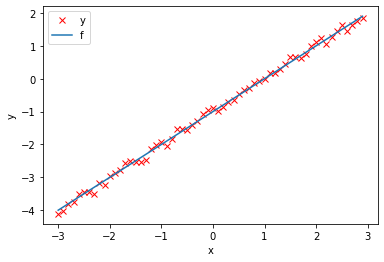

In [4]:
# Plot out the data dots and line

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
# Create class Data

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [6]:
# Create Data object and DataLoader object

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 1)

### <b> Creating Model and Cost Function

In [7]:
# Define the forward function

def forward(x):
    return w * x + b

In [8]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

### <b> Train the Model

### <b> Batch Gradient Descent

Method to find the minimum of a function

In [9]:
# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [10]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

In [11]:
# Train the model with 10 iterations

train_model(epochs)

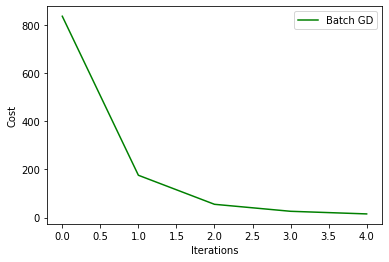

In [12]:
plt.plot(LOSS_BGD, color = 'g', label = 'Batch GD')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

### <b> Sthocastic Gradient Descent

Minimize one sample at time

In [13]:
# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [14]:
# The function for training the model

LOSS_SGD = []


def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in trainloader:
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()

In [15]:
# Train the model with 10 iterations

train_model_SGD(epochs)

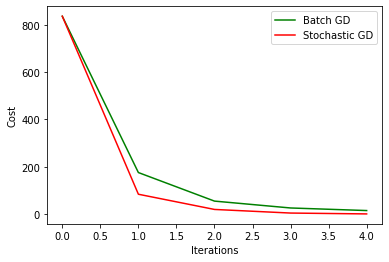

In [16]:
plt.plot(LOSS_BGD, color = 'g', label = 'Batch GD')
plt.plot(LOSS_SGD, color = 'r', label = 'Stochastic GD')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

### <b> Mini-batch Gradient Descent

Minimize smaller sets from dataseta at time

In [17]:
# Create DataLoader object and Data object

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [18]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [19]:
LOSS_MINI5 = []
lr = 0.1

def train_model_Mini5(epochs):
    
    for epoch in range(epochs):
        
        Yhat = forward(X)
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
    
        for x, y in trainloader:
            
            yhat = forward(x)
            loss = criterion(yhat, y)

            loss.backward()

            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            
            w.grad.data.zero_()
            b.grad.data.zero_()

In [20]:
train_model_Mini5(epochs)

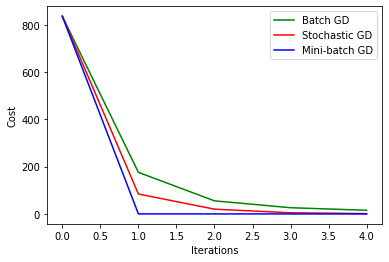

In [21]:
plt.plot(LOSS_BGD, color = 'g', label = 'Batch GD')
plt.plot(LOSS_SGD, color = 'r', label = 'Stochastic GD')
plt.plot(LOSS_MINI5, color = 'b', label = 'Mini-batch GD')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()